In [ ]:

from pandas import read_csv
from pandas import datetime
import math  
import sklearn.metrics 
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [ ]:
df = pd.read_csv('Acura MDX-Sales.csv')
df.head(100)

,Model,Year,Month,Sales Qty,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Acura MDX,2005,Jan,188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Acura MDX,2005,Feb,241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Acura MDX,2005,Mar,297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Acura MDX,2005,Apr,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Acura MDX,2005,May,351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Acura MDX,2012,Dec,506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,Acura MDX,2013,Jan,257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,Acura MDX,2013,Feb,165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,Acura MDX,2013,Mar,783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Start Cleaning

In [ ]:
df_clean = df.copy()

In [ ]:
df_clean = df_clean.drop(columns=['Model'])

In [ ]:
df_clean = df_clean.drop(columns=['Unnamed: 4'])
df_clean = df_clean.drop(columns=['Unnamed: 5'])
df_clean = df_clean.drop(columns=['Unnamed: 6'])
df_clean = df_clean.drop(columns=['Unnamed: 7'])
df_clean = df_clean.drop(columns=['Unnamed: 8'])
df_clean = df_clean.drop(columns=['Unnamed: 9'])
df_clean = df_clean.drop(columns=['Unnamed: 10'])
df_clean = df_clean.drop(columns=['Unnamed: 11'])
df_clean = df_clean.drop(columns=['Unnamed: 12'])
df_clean = df_clean.drop(columns=['Unnamed: 13'])
df_clean = df_clean.drop(columns=['Unnamed: 14'])
df_clean.head()

,Year,Month,Sales Qty
0,2005,Jan,188
1,2005,Feb,241
2,2005,Mar,297
3,2005,Apr,-
4,2005,May,351


In [ ]:
df_clean['Month'].replace("Jan",'1',inplace=True)
df_clean['Month'].replace("Feb",'2',inplace=True)
df_clean['Month'].replace("Mar",'3',inplace=True)
df_clean['Month'].replace("Apr",'4',inplace=True)
df_clean['Month'].replace("May",'5',inplace=True)
df_clean['Month'].replace("Jun",'6',inplace=True)
df_clean['Month'].replace("Jul",'7',inplace=True)
df_clean['Month'].replace("Aug",'8',inplace=True)
df_clean['Month'].replace("Sep",'9',inplace=True)
df_clean['Month'].replace("Oct",'10',inplace=True)
df_clean['Month'].replace("Nov",'11',inplace=True)
df_clean['Month'].replace("Dec",'12',inplace=True)
df_clean

,Year,Month,Sales Qty
0,2005,1,188
1,2005,2,241
2,2005,3,297
3,2005,4,-
4,2005,5,351
...,...,...,...
211,2022,8,-
212,2022,9,-
213,2022,10,-
214,2022,11,-


In [ ]:
df_clean["Sales Qty"] = pd.to_numeric(df_clean["Sales Qty"], errors = 'coerce')

In [ ]:
df_clean['DATE'] = pd.to_datetime(df_clean[['Year', 'Month']].assign(DAY=1))
df_clean

,Year,Month,Sales Qty,DATE
0,2005,1,188.0,2005-01-01
1,2005,2,241.0,2005-02-01
2,2005,3,297.0,2005-03-01
3,2005,4,NaN,2005-04-01
4,2005,5,351.0,2005-05-01
...,...,...,...,...
211,2022,8,NaN,2022-08-01
212,2022,9,NaN,2022-09-01
213,2022,10,NaN,2022-10-01
214,2022,11,NaN,2022-11-01


In [ ]:
df_clean = df_clean.drop(columns=['Month'])
df_clean = df_clean.drop(columns=['Year'])
df_clean

,Sales Qty,DATE
0,188.0,2005-01-01
1,241.0,2005-02-01
2,297.0,2005-03-01
3,NaN,2005-04-01
4,351.0,2005-05-01
...,...,...
211,NaN,2022-08-01
212,NaN,2022-09-01
213,NaN,2022-10-01
214,NaN,2022-11-01


In [ ]:
df_clean = df_clean[df_clean.columns[::-1]] 
df_clean

,DATE,Sales Qty
0,2005-01-01,188.0
1,2005-02-01,241.0
2,2005-03-01,297.0
3,2005-04-01,NaN
4,2005-05-01,351.0
...,...,...
211,2022-08-01,NaN
212,2022-09-01,NaN
213,2022-10-01,NaN
214,2022-11-01,NaN


In [ ]:
df_clean = df_clean.dropna()
df_clean

,DATE,Sales Qty
0,2005-01-01,188.0
1,2005-02-01,241.0
2,2005-03-01,297.0
4,2005-05-01,351.0
5,2005-06-01,336.0
...,...,...
201,2021-10-01,406.0
202,2021-11-01,303.0
203,2021-12-01,275.0
204,2022-01-01,180.0


In [ ]:
df_clean.dtypes

DATE         datetime64[ns]
Sales Qty           float64
dtype: object

In [ ]:
df = df_clean


### Cleaned data that will used for Model

In [ ]:
df

,DATE,Sales Qty
0,2005-01-01,188.0
1,2005-02-01,241.0
2,2005-03-01,297.0
4,2005-05-01,351.0
5,2005-06-01,336.0
...,...,...
201,2021-10-01,406.0
202,2021-11-01,303.0
203,2021-12-01,275.0
204,2022-01-01,180.0


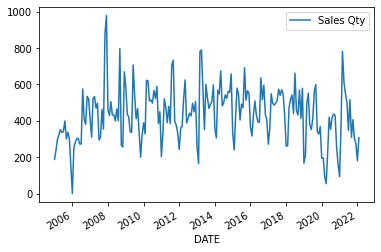

In [ ]:
df_clean.plot(x='DATE')

### Divide data into two classes
### X is feature and Y is target

In [ ]:
X = df['DATE']
Y = df['Sales Qty']
print(X)
print(Y)

0     2005-01-01
1     2005-02-01
2     2005-03-01
4     2005-05-01
5     2005-06-01
         ...    
201   2021-10-01
202   2021-11-01
203   2021-12-01
204   2022-01-01
205   2022-02-01
Name: DATE, Length: 203, dtype: datetime64[ns]
0      188.0
1      241.0
2      297.0
4      351.0
5      336.0
       ...  
201    406.0
202    303.0
203    275.0
204    180.0
205    307.0
Name: Sales Qty, Length: 203, dtype: float64


### Splitting the data into training and testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

### Instantiate Random Forest Regressor

In [ ]:
random_forest_model = RandomForestRegressor(n_estimators= 25)

### Fit training data in Algorithm

In [ ]:
random_forest_model.fit(X_train.values.reshape(-1,1), y_train)

RandomForestRegressor(n_estimators=25)

### Making Predictions

In [ ]:
Y_prediction = random_forest_model.predict(X_test.values.reshape(-1,1))
Y_prediction 

array([336.04, 319.08, 596.2 , 601.96, 515.52, 342.96, 474.48, 188.48,
       273.8 , 185.76, 413.04, 457.44, 525.64, 312.32, 402.44, 558.44,
       547.72, 420.28, 437.84, 496.24, 300.56, 413.96, 267.96, 508.6 ,
       586.2 , 466.24, 403.  , 448.08, 519.48, 535.76, 536.04, 417.52,
       569.6 , 505.6 , 490.04, 568.96, 430.44, 567.48, 536.68, 517.48,
       361.32, 326.52, 458.92, 433.12, 361.84, 254.6 , 544.52, 368.12,
       534.84, 535.56, 430.4 , 493.32, 437.76, 341.28, 372.4 , 404.2 ,
       552.44, 366.48, 424.68, 373.36, 477.92])

### Calculate Root mean squared error

In [ ]:
mse = sklearn.metrics.mean_squared_error(y_test, Y_prediction)
rmse = math.sqrt(mse)  
rmse

165.3238004743379

### Find sales in Specific Month

In [ ]:
s = pd.Series(['2023-06-01'])
# converts string to datetime
sd = pd.to_datetime(s)
# converts datetime to float 
sf = pd.to_numeric(sd)

s_prediction = random_forest_model.predict(sf.values.reshape(1,-1))
s_prediction

array([286.52])

That's it